In [1]:
import pandas, numpy

In [20]:
import scipy, scipy.stats

In [2]:
import seaborn
seaborn.set_style("white")

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# user-defined variables

In [4]:
public_data_file = '/Users/adrian/research/akureyri/results/distance2health/public_data_converted_tpm.tsv'
inhouse_data_file = '/Users/adrian/research/akureyri/results/sleuth_pipeline/sleuth_tpm_bygene.tsv'
selected_genes_files = '/Users/adrian/research/akureyri/results/sleuth_pipeline/geneset_effect_culture_bothdays.tsv'

# read information

In [5]:
df = pandas.read_csv(public_data_file, sep='\t')
log2tpm_public = numpy.log2(df + 1)
log2tpm_public

,Normal_Cart_10_8,Normal_Cart_2_2,Normal_Cart_3_3,Normal_Cart_4_4,Normal_Cart_5_5,Normal_Cart_6_6,Normal_Cart_7_3,Normal_Cart_9_7,normal_01,normal_02,normal_03,normal_04,normal_05,normal_06,normal_07,normal_08,normal_09,normal_10
ENSG00000121410,0.658765,1.589020,0.722497,0.335367,0.930959,1.002635,0.587340,0.320064,1.489144,0.000000,0.688667,2.522735,1.166982,0.286260,1.400131,0.700524,0.000000,0.816572
ENSG00000268895,0.271781,1.659117,0.000000,0.189803,0.000000,1.055547,0.622880,0.000000,0.000000,0.868808,0.285863,1.557348,0.618537,0.771908,0.476585,0.000000,0.276638,0.268430
ENSG00000148584,0.152575,0.090206,0.000000,0.381459,0.149535,0.826867,0.164872,0.193622,0.231646,0.069561,0.028080,0.258288,0.443697,0.088761,0.049781,0.522831,0.105448,0.102138
ENSG00000175899,5.901698,7.105708,5.923687,7.574389,4.937442,5.400422,5.992444,6.882896,6.475429,4.948456,6.896525,6.229287,5.796516,6.167908,6.865278,6.975635,6.718645,5.677264
ENSG00000245105,4.845330,5.853720,4.333358,6.808272,4.792823,5.761472,5.043927,5.287943,5.355773,3.044607,4.673751,4.409579,4.468802,4.539319,3.053281,4.964185,4.825998,3.854157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000203995,0.085580,0.000000,0.330462,0.029597,0.147565,0.710103,0.162711,0.259090,0.050722,0.057407,0.000000,0.193098,0.000000,0.273325,0.119759,0.069713,0.044265,0.124901
ENSG00000162378,1.223699,2.549738,2.280097,2.150548,2.389515,1.291302,2.101683,2.102887,3.409403,3.104874,3.180639,3.599423,3.180673,3.927583,2.974496,3.342556,3.670880,3.049125
ENSG00000285443,5.808981,5.386363,4.218644,5.201525,5.631254,5.428914,5.965725,5.132636,4.559351,4.110982,4.899433,4.548393,4.829140,4.795371,4.574820,3.340982,4.491311,3.924504
ENSG00000074755,2.279126,2.946231,2.520581,2.590709,1.629398,2.251935,2.861964,3.037766,3.162734,3.198358,3.272299,3.928340,2.985246,4.223648,3.290609,3.140600,3.301894,3.676050


In [6]:
df = pandas.read_csv(inhouse_data_file, sep='\t')
log2tpm_private = numpy.log2(df + 1)
log2tpm_private

,test01,test02,test03,test04,test05,test06,test07,test08,test09,test10,test11,test12
ENSG00000000003,3.772397,3.855337,3.982237,3.820647,3.987175,3.935874,3.854020,3.575846,3.959879,4.043964,3.989496,3.794488
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,6.951445,6.662231,7.110654,6.674438,7.074403,6.555525,7.012643,6.505830,6.952361,6.549750,6.603737,6.767288
ENSG00000000457,2.225953,2.616419,2.438199,2.070149,1.866105,2.496270,2.409943,2.377773,2.404488,2.551230,2.469583,2.282852
ENSG00000000460,4.056073,3.410441,3.885631,4.172774,3.767407,3.134348,3.635261,4.441199,4.235495,3.274711,4.311093,4.214814
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000293548,0.052298,0.027872,0.155509,0.000000,0.000000,0.046376,0.149810,0.169377,0.097691,0.239066,0.070934,0.000000
ENSG00000293550,0.046093,0.007601,0.039703,0.018852,0.038155,0.019385,0.015153,0.000000,0.068938,0.051003,0.038712,0.037354
ENSG00000293553,0.000000,0.392448,0.000000,0.128744,0.000000,0.000000,0.042472,0.000000,0.000000,0.299668,0.000000,0.000000
ENSG00000293563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
df = pandas.read_csv(selected_genes_files, sep='\t')
selected_genes = df['0']
selected_genes

0      ENSG00000143847
1      ENSG00000196352
2      ENSG00000115738
3      ENSG00000161011
4      ENSG00000104833
            ...       
152    ENSG00000019549
153    ENSG00000143355
154    ENSG00000104419
155    ENSG00000075213
156    ENSG00000286190
Name: 0, Length: 157, dtype: object

In [8]:
log2tpm_private = log2tpm_private.loc[selected_genes]
log2tpm_private.shape

(157, 12)

# exploratory plots

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_39706/3544567024.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30, fontsize=12)


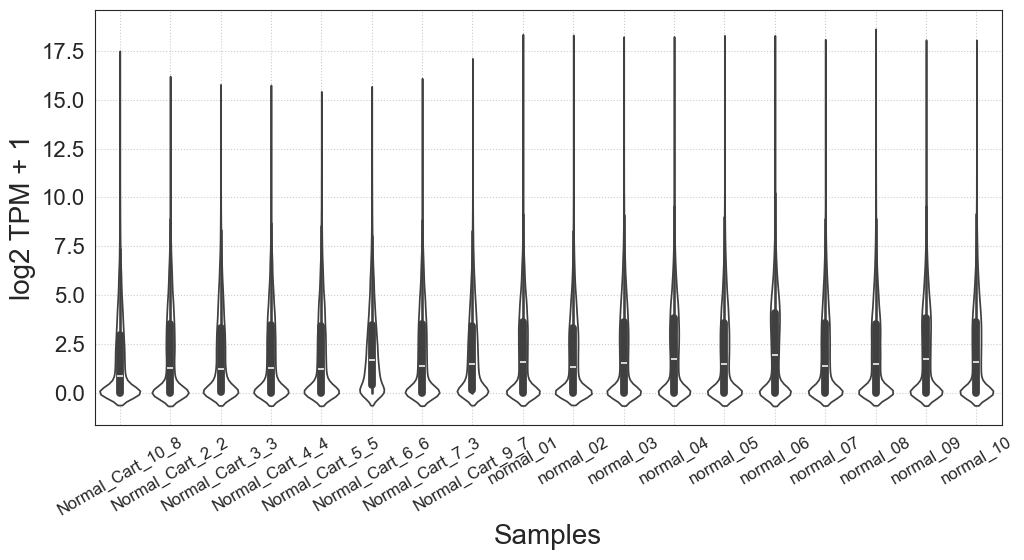

In [9]:
g = seaborn.violinplot(data=log2tpm_public, color='white')
g.set(ylabel='log2 TPM + 1', xlabel='Samples')
g.set_xticklabels(g.get_xticklabels(), rotation=30, fontsize=12)
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_39706/3385090767.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30, fontsize=12)


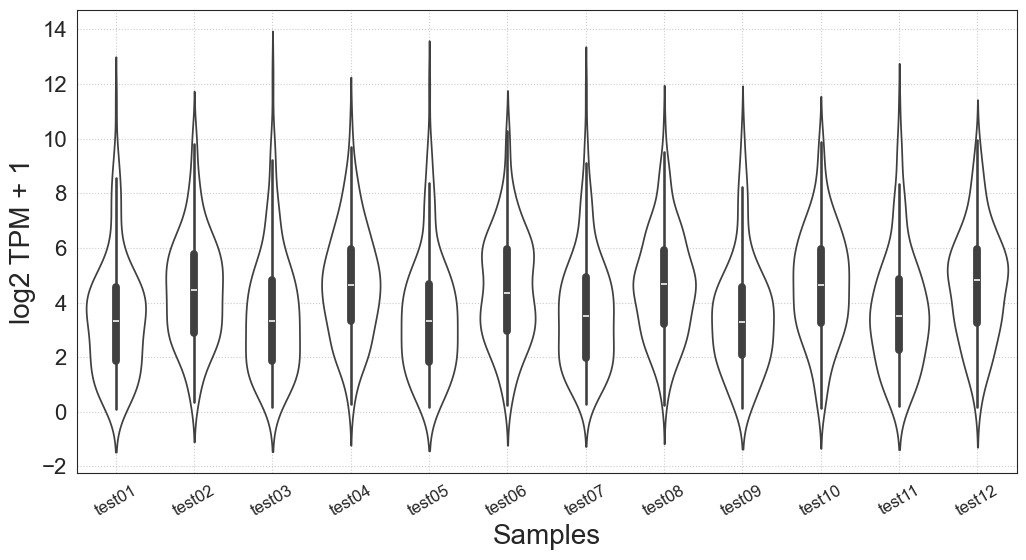

In [10]:
g = seaborn.violinplot(data=log2tpm_private, color='white')
g.set(ylabel='log2 TPM + 1', xlabel='Samples')
g.set_xticklabels(g.get_xticklabels(), rotation=30, fontsize=12)
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# merge and plot both data set

In [11]:
print(log2tpm_public.shape)
print(log2tpm_private.shape)
merged = pandas.concat([log2tpm_public, log2tpm_private], axis=1, join="inner")
print(merged.shape)
merged.head()

(20647, 18)
(157, 12)
(132, 30)


,Normal_Cart_10_8,Normal_Cart_2_2,Normal_Cart_3_3,Normal_Cart_4_4,Normal_Cart_5_5,Normal_Cart_6_6,Normal_Cart_7_3,Normal_Cart_9_7,normal_01,normal_02,...,test03,test04,test05,test06,test07,test08,test09,test10,test11,test12
ENSG00000173210,0.232814,0.128955,0.422711,0.039015,0.250858,0.506417,0.559434,0.620771,0.250113,0.259246,...,2.203772,3.901697,1.406469,4.314355,3.192928,4.107256,2.200150,4.511934,2.787304,4.381609
ENSG00000176244,0.785333,0.877306,0.266825,0.408340,0.191136,1.934736,0.394052,0.000000,0.000000,0.000000,...,2.096045,1.407805,2.050169,1.124892,1.957336,1.163937,2.069860,0.992253,2.375962,1.235383
ENSG00000154734,3.476922,3.647446,2.894876,5.102464,5.044798,2.411896,4.927213,3.574027,5.705035,5.681446,...,5.303759,7.673096,3.836974,7.070477,6.251716,7.216082,4.617638,7.842775,5.026514,7.739745
ENSG00000063438,0.168413,0.000000,0.273355,0.065792,0.045899,0.402834,0.123783,0.298994,0.111772,0.077011,...,3.750245,5.102237,4.067313,6.034140,3.925992,5.427378,4.647296,6.121555,4.580079,5.479958
ENSG00000162433,2.311048,3.184742,3.407985,2.987574,2.805618,3.709641,2.483514,3.272911,4.433159,3.754069,...,6.044040,4.937178,5.576336,3.757442,6.035635,4.931873,6.007564,4.273604,6.084824,4.833374


/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_39706/266964514.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=12)


(132, 30)


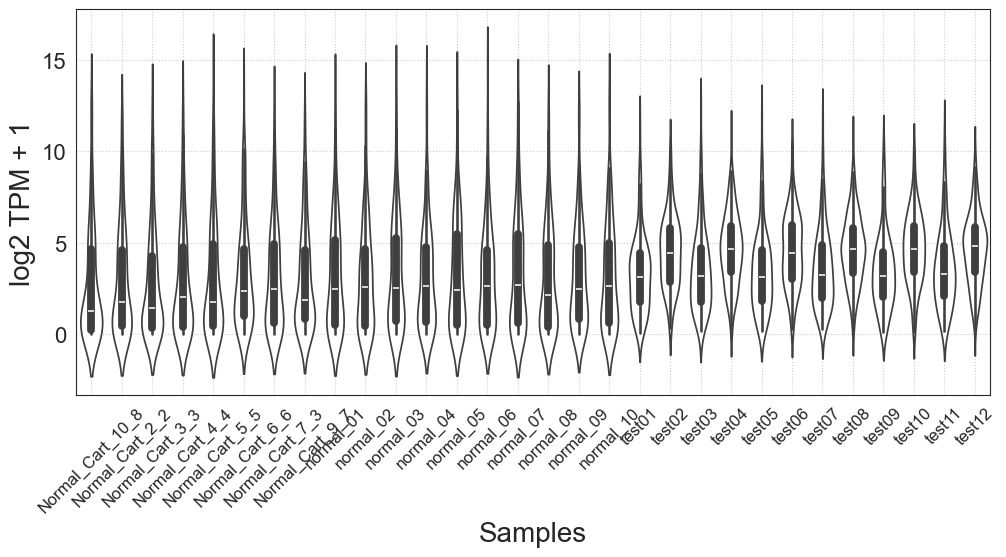

In [12]:
merged = pandas.concat([log2tpm_public, log2tpm_private], axis=1, join="inner")
print(merged.shape)

g = seaborn.violinplot(data=merged, color='white')
g.set(ylabel='log2 TPM + 1', xlabel='Samples')
g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=12)
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [13]:
###
### quantile normalization |  taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
###

# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(merged.values, axis=0), 
                             index=merged.index, 
                             columns=merged.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
df_qn = merged.rank(method="min").stack().astype(int).map(df_mean).unstack()

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_39706/261904043.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=12)


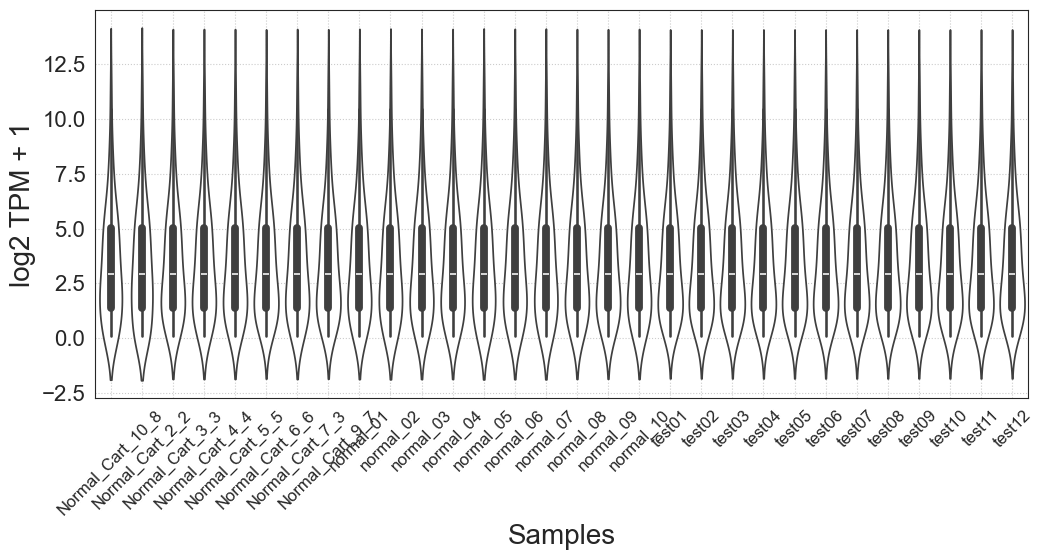

In [14]:
g = seaborn.violinplot(data=df_qn, color='white')
g.set(ylabel='log2 TPM + 1', xlabel='Samples')
g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=12)
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

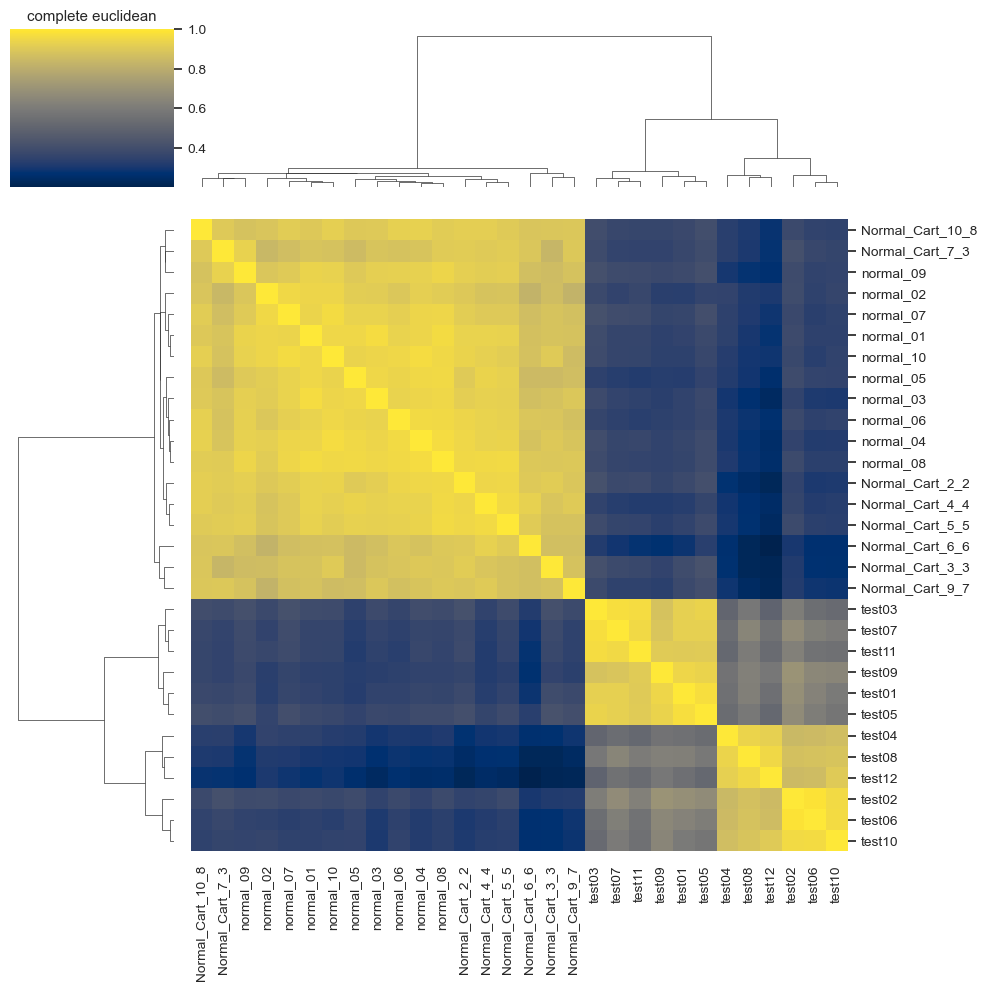

In [15]:
correlation = df_qn.corr(method='spearman')

# generate the figure with metabolite names
linkage_method = 'complete'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(correlation, cmap='cividis', col_cluster=True,
                   method=linkage_method, metric=distance_metric)

matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
matplotlib.pyplot.tight_layout()


In [16]:
# get a median normal Get three correlations for T2 2D and T2 3D
normals = df_qn.iloc[:, 0:18].median(axis=1)
cultures_2d = df_qn[['test05', 'test01', 'test09']].median(axis=1)
cultures_3d = df_qn[['test10', 'test02', 'test06']].median(axis=1)

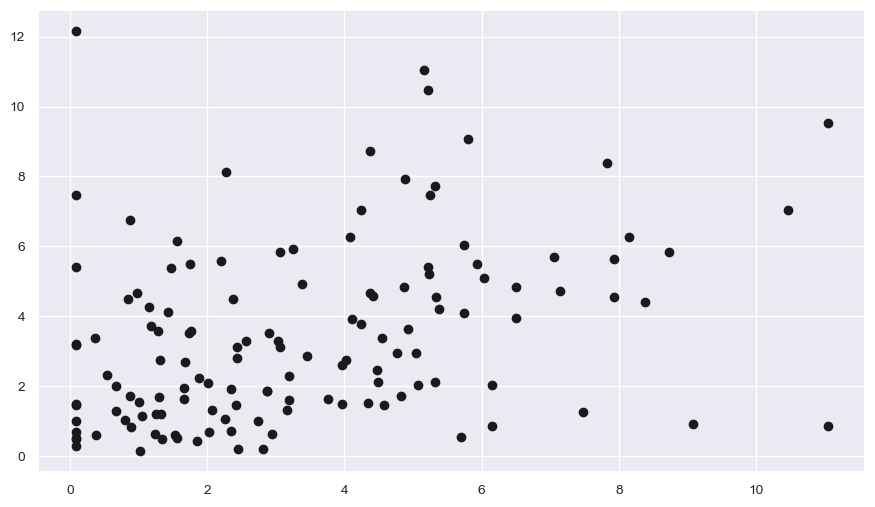

In [17]:
matplotlib.pyplot.plot(normals, cultures_2d, 'ok')

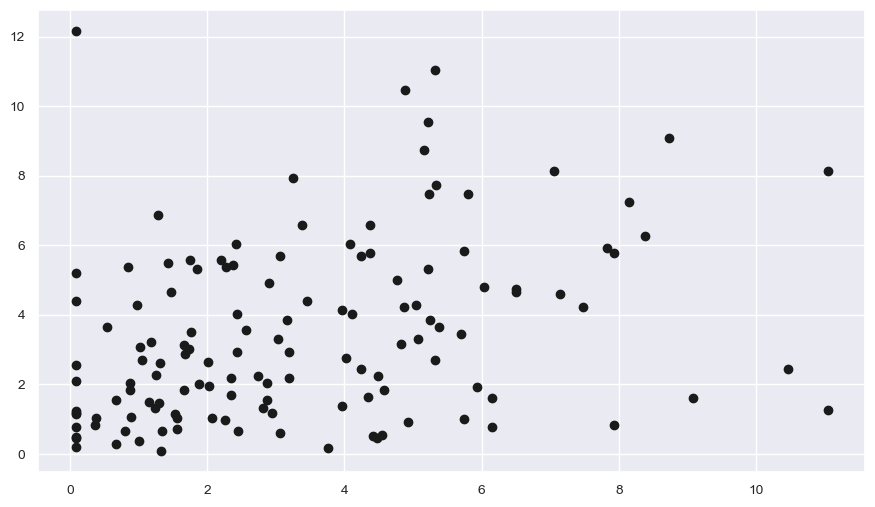

In [18]:
matplotlib.pyplot.plot(normals, cultures_3d, 'ok')


In [21]:
two = []; three = []

# 2D
for sample_name in ['test05', 'test01', 'test09']:
    r, p = scipy.stats.pearsonr(normals, df_qn[sample_name])
    two.append(r)
    
# 3D
for sample_name in ['test10', 'test02', 'test06']:
    r, p = scipy.stats.pearsonr(normals, df_qn[sample_name])
    three.append(r)

# print and test
print(two, three)
scipy.stats.ttest_ind(two, three)

[0.37281066606408053, 0.3432045017234451, 0.3390883682729362] [0.3379043662749146, 0.3616950820627056, 0.31820606628487846]


TtestResult(statistic=0.7553878363723348, pvalue=0.4920577135900046, df=4.0)